In [1]:
import numpy as np
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import pandas as pd
import re

# Read data from file 

In [44]:
#Npali Dataset Stop words
stop_words= set() 

with open('nepaliStopWords.txt',encoding='utf-8') as f:
        file_contents = f.read()
        
for val in file_contents.split('\n'):
    stop_words.add(val)
#stop_words

In [18]:
def get_file_data(stop_word_removal='no'):
    file_contents = []
    with open('nepaliDataset.txt',encoding='utf-8') as f:
        file_contents = f.read()
    text = []
    
    for val in file_contents.split('।'):
        sent = re.findall("[\u0900-\u097F]+", val)
        line = ''
        for words in sent:
            
            if stop_word_removal == 'yes': 
                if len(words) > 1 and words not in stop_words:
                    line = line + ' ' + words
            else:
                if len(words) > 1 :
                    line = line + ' ' + words
        text.append(line)
    return text

In [20]:
nepli_corpus=get_file_data()
nepli_corpus

[' कुनैबेला नेपालमा संविधानसभा गणतन्त्रको नारा लगाउन मात्र पनि मुश्किल थियो',
 ' यस्तो नारा लगाउने कति देशद्रोही ठहरिए कतिले जेलनेल भोगे',
 ' कतिले जीवन नै गुमाउनुपर् यो',
 ' अहिले हामी संघीय लोकतान्त्रिक गणतन्त्रात्मक व्यवस्थामा छौं',
 ' यो व्यवस्थामा राजतन्त्र जनमत सङ्ग्रहको नारा लगाउनेहरुलाई आतंककारी घोषणा गरिँदैन जेलनेल बस्नुपर्दैन जीवन गुमाउनु पर्दैन',
 ' सम्भवतः लोकतन्त्रको सुन्दर पक्ष नै यही हो',
 ' जस्तो कि राप्रपाले राजासहितको राजनीतिक व्यवस्थाको लागि खुलारुपमा कार्यक्रम गर्न पाइरहेको शशांक कोइरालाहरु धर्म सापेक्षताको नारा लगाउन पाइरहेका छन्',
 ' रवीन्द्र मिश्रहरु धर्म सापेक्षता एकात्मक राज्य प्रणालीको पक्षमा जनमत सङ्ग्रहको माग गर्न पाइरहेका छन्',
 ' यसअघि साझा विवेकशील पार्टीका अध्यक्ष मिश्रले संकेत मात्रै गरे पनि अहिले भने खुलम्खुल्लारुपमा संघीयताको खारेजी धर्मनिरपेक्षताको मुद्दामा जनमत सङ्ग्रहको प्रस्ताव अगाडि सारेका हुन्',
 ' उनले घुमाउरो गरी राजाको स्वीकार्यता बढिरहेको पनि तर्क गरेका छन्',
 ' जबकि उनकै पार्टीले संविधानवाद स्वीकार्छ',
 ' नेपालको संविधानले धर्मनिरपेक्षता सम

# Generate variables 

    word_to_index : A dictionary mapping each word to an integer value {'modern': 0, 'humans': 1}

    index_to_word : A dictionary mapping each word to an integer value {0: 'modern', 1: 'humans'}

    corpus  : The entire data consisting of all the words

    vocab_size : Number of unique words in the corpus

In [22]:
def generate_dictinoary_data(text):
    word_to_index= dict()
    index_to_word = dict()
    corpus = []
    count = 0
    vocab_size = 0
    
    for row in text:
        for word in row.split():
            word = word.lower()
            corpus.append(word)
            if word_to_index.get(word) == None:
                word_to_index.update ( {word : count})
                index_to_word.update ( {count : word })
                count  += 1
    vocab_size = len(word_to_index)
    length_of_corpus = len(corpus)
    
    return word_to_index,index_to_word,corpus,vocab_size,length_of_corpus

Example: 

In [24]:
text = ['कुनैबेला नेपालमा संविधानसभा र गणतन्त्रको नारा लगाउन मात्र पनि मुश्किल थियो']
word_to_index,index_to_word,corpus,vocab_size,length_of_corpus = generate_dictinoary_data(text)
print('Number of unique words:' , vocab_size)
print('word_to_index : ',word_to_index)
print('index_to_word : ',index_to_word)
print('corpus:',corpus)
print('Length of corpus :',length_of_corpus)

Number of unique words: 11
word_to_index :  {'कुनैबेला': 0, 'नेपालमा': 1, 'संविधानसभा': 2, 'र': 3, 'गणतन्त्रको': 4, 'नारा': 5, 'लगाउन': 6, 'मात्र': 7, 'पनि': 8, 'मुश्किल': 9, 'थियो': 10}
index_to_word :  {0: 'कुनैबेला', 1: 'नेपालमा', 2: 'संविधानसभा', 3: 'र', 4: 'गणतन्त्रको', 5: 'नारा', 6: 'लगाउन', 7: 'मात्र', 8: 'पनि', 9: 'मुश्किल', 10: 'थियो'}
corpus: ['कुनैबेला', 'नेपालमा', 'संविधानसभा', 'र', 'गणतन्त्रको', 'नारा', 'लगाउन', 'मात्र', 'पनि', 'मुश्किल', 'थियो']
Length of corpus : 11


# Generate training data 

The training data is in the following format :

Example:

    Window size = 2, Vocab size = 9


    We will set the indicies as 1 according to the word_to_index dict i.e natural : 0,  so we set the 0th index as 1 to denote natural

    Target word = best    
    Context words = (way,to)
    Target_word_one_hot_vector = [1, 0, 0, 0, 0, 0, 0, 0, 0]
    Context_word_one_hot_vector = [0, 1, 1, 0, 0, 0, 0, 0, 0]
    
    Target word = way    
    Context words = (best,to,success)
    Target_word_one_hot_vector = [0, 1, 0, 0, 0, 0, 0, 0, 0]
    Context_word_one_hot_vector= [1, 0, 1, 1, 0, 0, 0, 0, 0]
    

In [25]:
def get_one_hot_vectors(target_word,context_words,vocab_size,word_to_index):
    
    #Create an array of size = vocab_size filled with zeros
    trgt_word_vector = np.zeros(vocab_size)
    
    #Get the index of the target_word according to the dictionary word_to_index. 
    #If target_word = best, the index according to the dictionary word_to_index is 0. 
    #So the one hot vector will be [1, 0, 0, 0, 0, 0, 0, 0, 0]
    index_of_word_dictionary = word_to_index.get(target_word) 
    
    #Set the index to 1
    trgt_word_vector[index_of_word_dictionary] = 1
    
    #Repeat same steps for context_words but in a loop
    ctxt_word_vector = np.zeros(vocab_size)
    
    
    for word in context_words:
        index_of_word_dictionary = word_to_index.get(word) 
        ctxt_word_vector[index_of_word_dictionary] = 1
        
    return trgt_word_vector,ctxt_word_vector

In [26]:
#Note : Below comments for trgt_word_index, ctxt_word_index are with the above sample text for understanding the code flow

def generate_training_data(corpus,window_size,vocab_size,word_to_index,length_of_corpus,sample=None):

    training_data =  []
    training_sample_words =  []
    for i,word in enumerate(corpus):

        index_target_word = i
        target_word = word
        context_words = []

        #when target word is the first word
        if i == 0:  

            # trgt_word_index:(0), ctxt_word_index:(1,2)
            context_words = [corpus[x] for x in range(i + 1 , window_size + 1)] 


        #when target word is the last word
        elif i == len(corpus)-1:

            # trgt_word_index:(9), ctxt_word_index:(8,7), length_of_corpus = 10
            context_words = [corpus[x] for x in range(length_of_corpus - 2 ,length_of_corpus -2 - window_size  , -1 )]

        #When target word is the middle word
        else:

            #Before the middle target word
            before_target_word_index = index_target_word - 1
            for x in range(before_target_word_index, before_target_word_index - window_size , -1):
                if x >=0:
                    context_words.extend([corpus[x]])

            #After the middle target word
            after_target_word_index = index_target_word + 1
            for x in range(after_target_word_index, after_target_word_index + window_size):
                if x < len(corpus):
                    context_words.extend([corpus[x]])


        trgt_word_vector,ctxt_word_vector = get_one_hot_vectors(target_word,context_words,vocab_size,word_to_index)
        training_data.append([trgt_word_vector,ctxt_word_vector])   
        
        if sample is not None:
            training_sample_words.append([target_word,context_words])   
        
    return training_data,training_sample_words

Example:

In [27]:
text = ['मानिसहरूले पर्याप्त आशंका गरेपछि मिश्रले बेलाबेलामा अहिलेको व्यवस्थाप्रतिको प्रतिवद्धता सार्वजनिक रुपमा व्यक्त गर्दै आएका थिए']
word_to_index,index_to_word,corpus,vocab_size,length_of_corpus = generate_dictinoary_data(text)

In [28]:
window_size = 2
training_data,training_sample_words = generate_training_data(corpus,2,vocab_size,word_to_index,length_of_corpus,'yes')

In [29]:
for i in range(len(training_data)):
    print('*' * 100)
    print('Target word:%s . Target vector: %s ' %(training_sample_words[i][0],training_data[i][0]))
    print('Context word:%s . Context  vector: %s ' %(training_sample_words[i][1],training_data[i][1]))

****************************************************************************************************
Target word:मानिसहरूले . Target vector: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 
Context word:['पर्याप्त', 'आशंका'] . Context  vector: [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 
****************************************************************************************************
Target word:पर्याप्त . Target vector: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 
Context word:['मानिसहरूले', 'आशंका', 'गरेपछि'] . Context  vector: [1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 
****************************************************************************************************
Target word:आशंका . Target vector: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 
Context word:['पर्याप्त', 'मानिसहरूले', 'गरेपछि', 'मिश्रले'] . Context  vector: [1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 
************************************************************************************************

# Forward_back_prop  

In [30]:
def forward_prop(weight_inp_hidden,weight_hidden_output,target_word_vector):
    
    #target_word_vector = x , weight_inp_hidden =  weights for input layer to hidden layer  
    hidden_layer = np.dot(weight_inp_hidden.T, target_word_vector)
    
    #weight_hidden_output = weights for hidden layer to output layer
    u = np.dot(weight_hidden_output.T, hidden_layer)
    
    y_predicted = softmax(u)
    
    return y_predicted, hidden_layer, u
  
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

In [31]:
def backward_prop(weight_inp_hidden,weight_hidden_output,total_error, hidden_layer, target_word_vector,learning_rate):
    
    dl_weight_inp_hidden = np.outer(target_word_vector, np.dot(weight_hidden_output, total_error.T))
    dl_weight_hidden_output = np.outer(hidden_layer, total_error)
    
    # Update weights
    weight_inp_hidden = weight_inp_hidden - (learning_rate * dl_weight_inp_hidden)
    weight_hidden_output = weight_hidden_output - (learning_rate * dl_weight_hidden_output)
    
    return weight_inp_hidden,weight_hidden_output

# Loss and error calculation 

<h4> Error calculation : This is backpropogated to update the weights for the next iteration </h4>

Example: below if we have 2 context words. These are not actual values. 

These are just for showing how the error is calculated

context_words = [1 0 0 1 0]

y_pred = [9 6 5 4 2]

So if we break the context_word vector : [1 0 0 0 0] and [0 0 0 1 0] . 1 at index 0 and 3

    The error should be calculated as :

    diff_1 = y_pred - context_word_vector_1 = [9 6 5 4 2] - [1 0 0 0 0] = [8 6 5 4 2]

    diff_2 = y_pred - context_word_vector_2 = [9 6 5 4 2] - [0 0 0 1 0] = [9 6 5 3 2]
    
    Total_error = diff_1 + diff_2(column_wise) = [17 12 10 7 4]
    
    Since our context vector has only 1 array , we implement the above as:
    
    index_of_1_in_context_words ->
        A dictionary which has the index of 1's in the context_word_vector -> {0: 'yes', 3: 'yes'}
    
    number_of_1_in_context_vector -> A count for the above -> 2
    
    We loop the y_pred array and do the calculations as:
    
    for i,value in enumerate(y_p):
    
         if the ith index of y_pred has a 1 in context_word_vector:
             total_error[i]  -> i:0 . y_pred[i]:9.  -> (9-1) + (1*9) -> error_calculated: 17
             total_error[i]  -> i:3 . y_pred[i]:4.  -> (4-1) + (1*4) -> error_calculated: 7

        else:
         
            total_error[i]  -> i:1 . y_pred[i]:6.  -> 6*2 -> error_calculated: 12
            total_error[i]  -> i:2 . y_pred[i]:5.  -> 5*2 -> error_calculated: 10
            total_error[i]  -> i:4 . y_pred[i]:2.  -> 2*2 -> error_calculated: 4
    
    total_error  ->  [17 12 10 7 4]

In [32]:
def calculate_error(y_pred,context_words):
    
    total_error = [None] * len(y_pred)
    index_of_1_in_context_words = {}
    
    for index in np.where(context_words == 1)[0]:
        index_of_1_in_context_words.update ( {index : 'yes'} )
        
    number_of_1_in_context_vector = len(index_of_1_in_context_words)
    
    for i,value in enumerate(y_pred):
        
        if index_of_1_in_context_words.get(i) != None:
            total_error[i]= (value-1) + ( (number_of_1_in_context_vector -1) * value)
        else:
            total_error[i]= (number_of_1_in_context_vector * value)
            
            
    return  np.array(total_error)

<h4> Loss calculation: This is the loss after each iteration i.e for target word, how well did we predict the context words </h4>

    u : [ 0.3831286   0.89608496  2.69426738 -1.60230182  0.45482701  0.73644591 1.10365796  1.1675781  -0.78555069]

    context: [0, 1, 1, 0, 0, 0, 0, 0, 0]

    sum_1 = -(0.89608496 + 2.69426738)

    sum_2 = number_of_context_words * np.log(np.sum(np.exp(u)))

    total_loss = sum_1 + sum_2

In [33]:
def calculate_loss(u,ctx):
    
    sum_1 = 0
    for index in np.where(ctx==1)[0]:
        sum_1 = sum_1 + u[index]
    
    sum_1 = -sum_1
    sum_2 = len(np.where(ctx==1)[0]) * np.log(np.sum(np.exp(u)))
    
    total_loss = sum_1 + sum_2
    return total_loss

# Model training 

In [34]:
# dimensions of word embeddings, also refer to size of hidden layer
#the dimension of the word embedding and it typically ranges from 100 to 300 depending on your vocabulary size.
def train(word_embedding_dimension,window_size,epochs,training_data,learning_rate,disp = 'no',interval=-1):
    
    weights_input_hidden = np.random.uniform(-1, 1, (vocab_size, word_embedding_dimension))
    weights_hidden_output = np.random.uniform(-1, 1, (word_embedding_dimension, vocab_size))
    #print( weights_input_hidden)
    
    #For analysis purposes
    epoch_loss = []
    weights_1 = []
    weights_2 = []
    
    for epoch in range(epochs):
        loss = 0

        for target,context in training_data:
            y_pred, hidden_layer, u = forward_prop(weights_input_hidden,weights_hidden_output,target)

            total_error = calculate_error(y_pred, context)

            weights_input_hidden,weights_hidden_output = backward_prop(
                weights_input_hidden,weights_hidden_output ,total_error, hidden_layer, target,learning_rate
            )

            loss_temp = calculate_loss(u,context)
            loss += loss_temp
        
        epoch_loss.append( loss )
        weights_1.append(weights_input_hidden)
        weights_2.append(weights_hidden_output)
        
        if disp == 'yes':
            if epoch ==0 or epoch % interval ==0 or epoch == epochs -1:
                print('Epoch: %s. Loss:%s' %(epoch,loss))
    return epoch_loss,np.array(weights_1),np.array(weights_2)

# Model Inference

<h4> Distance measure between vectors </h4>

In [35]:
# Input vector, returns nearest word(s)
def cosine_similarity(word,weight,word_to_index,vocab_size,index_to_word):
    
    #Get the index of the word from the dictionary
    index = word_to_index[word]
    
    #Get the correspondin weights for the word
    word_vector_1 = weight[index]
    
    
    word_similarity = {}

    for i in range(vocab_size):
        
        word_vector_2 = weight[i]
        
        theta_sum = np.dot(word_vector_1, word_vector_2)
        theta_den = np.linalg.norm(word_vector_1) * np.linalg.norm(word_vector_2)
        theta = theta_sum / theta_den
        
        word = index_to_word[i]
        word_similarity[word] = theta
    
    return word_similarity #words_sorted

<h4> Print a matrix of similar words </h4>

In [36]:
def print_similar_words(top_n_words,weight,msg,words_subset):
    
    columns=[]
    
    for i in range(0,len(words_subset)):
        columns.append('similar:' +str(i+1) )
        
    df = pd.DataFrame(columns=columns,index=words_subset)
    df.head()
    
    row = 0
    for word in words_subset:
        
        #Get the similarity matrix for the word: word
        similarity_matrix = cosine_similarity(word,weight,word_to_index,vocab_size,index_to_word)
        col = 0
        
        #Sort the top_n_words
        words_sorted = dict(sorted(similarity_matrix.items(), key=lambda x: x[1], reverse=True)[1:top_n_words+1])
        
        #Create a dataframe to display the similarity matrix
        for similar_word,similarity_value in words_sorted.items():
            df.iloc[row][col] = (similar_word,round(similarity_value,2))
            col += 1
        row += 1
    styles = [dict(selector='caption', 
    props=[('text-align', 'center'),('font-size', '20px'),('color', 'red')])] 
    df = df.style.set_properties(**
                       {'color': 'green','border-color': 'blue','font-size':'14px'}
                      ).set_table_styles(styles).set_caption(msg)
    return df

<h4> Plot words as scatter plot from T-Sne </h4>

In [37]:
def word_similarity_scatter_plot(index_to_word,weight,plot_title,fig,axes):
    
    labels = []
    tokens = []
    
    for key,value in index_to_word.items():
        tokens.append(weight[key])
        labels.append(value)
        
    #TSNE : Compressing the weights to 2 dimensions to plot the data
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)
    
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    
    
    #plt.figure(figsize=(5, 5)) 
    for i in range(len(x)):
        axes.scatter(x[i],y[i])
        axes.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    #plt.title(plot_title)
    axes.set_title(plot_title, loc='center')

<h4> Epoch - loss plot </h4>

In [38]:
def plot_epoch_loss(lbl,loss_epoch,plot_title,path):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
    i = 0
    fig = plt.figure(figsize=(10, 5), facecolor='w', edgecolor='k',dpi=80)
    plt.suptitle('Epoch vs Loss',fontsize=16)
    
    for key,loss in loss_epoch.items():
        
        
        epoch_count = range(1, len(loss) + 1)

        plt.plot(epoch_count, loss, 'r-',color=colors[i],linewidth=2.0,label = lbl + str(key))

        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        i += 1

    plt.legend(framealpha=1, frameon=True,fontsize='large',edgecolor="inherit",shadow=True)
    plt.title(plot_title)
    plt.savefig(path+plot_title +'.png')
    plt.show()
    plt.close()    

# Analysis

In [39]:
path_to_save = 'Output/epoc_loss_plot/'
path_to_save_scatter_plot = 'Output/word_similarity_scatter_plot/'

<h4> Varying dimensions of word embedding </h4>

In [40]:
window_size = 2
epochs = 100
learning_rate = 0.01
text = ['मानिसहरूले पर्याप्त आशंका गरेपछि मिश्रले बेलाबेलामा अहिलेको व्यवस्थाप्रतिको प्रतिवद्धता सार्वजनिक रुपमा व्यक्त गर्दै आएका थिए']

word_to_index,index_to_word,corpus,vocab_size,length_of_corpus = generate_dictinoary_data(text)
training_data,training_sample_words = generate_training_data(corpus,window_size,vocab_size,word_to_index,length_of_corpus)

C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2350 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2366 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2344 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2367 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2360 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2361 missing from current

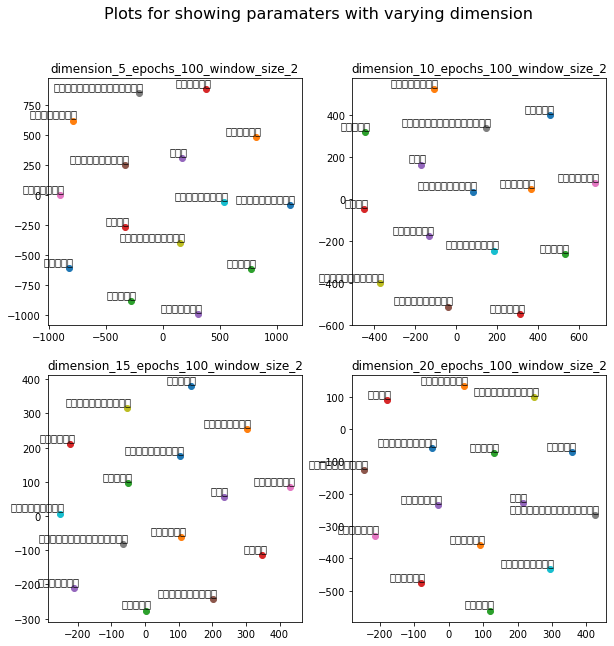

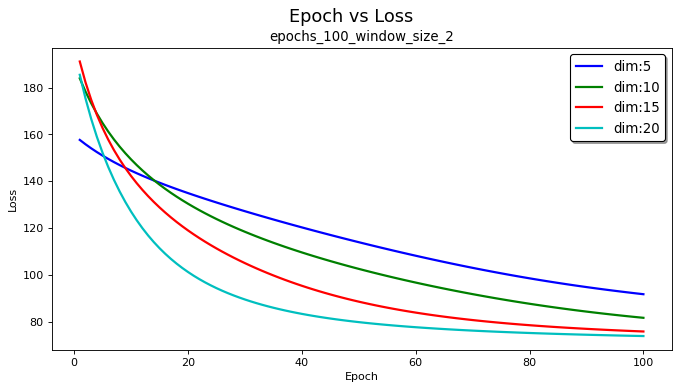

In [41]:
dimensions = [5,10,15,20]
loss_epoch = {}
fig,axes = plt.subplots(nrows=2, ncols=2,figsize=(10,10),)
fig.suptitle("Plots for showing paramaters with varying dimension", fontsize=16)
row=0
col=0
for dim in dimensions:
    
    epoch_loss,weights_1,weights_2 = train(dim,window_size,epochs,training_data,learning_rate)
    loss_epoch.update( {dim: epoch_loss} )
    
    word_similarity_scatter_plot(
        index_to_word,
        weights_1[epochs -1],
        'dimension_' + str(dim) + '_epochs_' + str(epochs) + '_window_size_' +str(window_size),
        fig,
        axes[row][col]
    )
    if col == 1:
        row += 1
        col = 0
    else:
        col += 1

plt.savefig(path_to_save_scatter_plot+'varying_dim' +'.png')        
plt.show()

plot_epoch_loss('dim:',loss_epoch,'epochs_' + str(epochs) + '_window_size_' +str(window_size),path_to_save)

<h4> Varying dimensions of window size </h4>

<h4> Bigger Corpus </h4>

In [45]:
path_to_save = 'Output/epoc_loss_plot/'
path_to_save_scatter_plot = 'Output/word_similarity_scatter_plot/'

In [46]:
def word_similarity_scatter_plot_bigger_corpus(index_to_word,weight,plot_title,path):
    
    labels = []
    tokens = []
    
    for key,value in index_to_word.items():
        tokens.append(weight[key])
        labels.append(value)
        
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)
    
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    
    x = x[0:200]
    y = y[0:200]
    
    plt.figure(figsize=(20, 30)) 

    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom',
                    family='fantasy')
    plt.title(plot_title)
    plt.savefig(path+plot_title +'.png')
    plt.close()   

<h4>1. Stop words effect<h4>

In [50]:
epochs = 1500
top_n_words = 5
dimension = 40
window_size = 4
learning_rate = 0.001

<h4>Without stopwords </h4>

In [51]:
text = get_file_data('yes')
word_to_index,index_to_word,corpus,vocab_size,length_of_corpus = generate_dictinoary_data(text)
training_data,training_sample_words = generate_training_data(corpus,window_size,vocab_size,word_to_index,length_of_corpus)
print('Number of unique words:' , vocab_size)
print('Length of corpus :',length_of_corpus)
words_subset = []
words_subset = np.random.choice(list(word_to_index.keys()),top_n_words)
print(words_subset)

Number of unique words: 447
Length of corpus : 577
['थाले' 'खुलारुपमा' 'नेतृत्वसहितको' 'मानिसहरूले' 'मुद्दा']


Epoch: 0. Loss:37402.353463025735
Epoch: 50. Loss:28436.639229552096
Epoch: 100. Loss:23558.799251229888
Epoch: 150. Loss:19613.998222235314
Epoch: 200. Loss:16511.882829540533
Epoch: 250. Loss:14406.784328466036
Epoch: 300. Loss:13154.420806944649
Epoch: 350. Loss:12440.768277653353
Epoch: 400. Loss:12018.875628931568
Epoch: 450. Loss:11755.044001377411
Epoch: 500. Loss:11581.758820600753
Epoch: 550. Loss:11463.326474916052
Epoch: 600. Loss:11379.612520024979
Epoch: 650. Loss:11318.615796509424
Epoch: 700. Loss:11272.867356760251
Epoch: 750. Loss:11237.586098928059
Epoch: 800. Loss:11209.67340317144
Epoch: 850. Loss:11187.099269125913
Epoch: 900. Loss:11168.502792604766
Epoch: 950. Loss:11152.943477010043
Epoch: 1000. Loss:11139.752061352481
Epoch: 1050. Loss:11128.440011141816
Epoch: 1100. Loss:11118.642816305333
Epoch: 1150. Loss:11110.083283077252
Epoch: 1200. Loss:11102.547071820605
Epoch: 1250. Loss:11095.865980049755
Epoch: 1300. Loss:11089.906262939729
Epoch: 1350. Loss:11084.5

C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2325 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2369 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2344 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2348 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2375 missing from current

C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 2370 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2330 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 2330 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2371 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 2371 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2337 missing from current font.

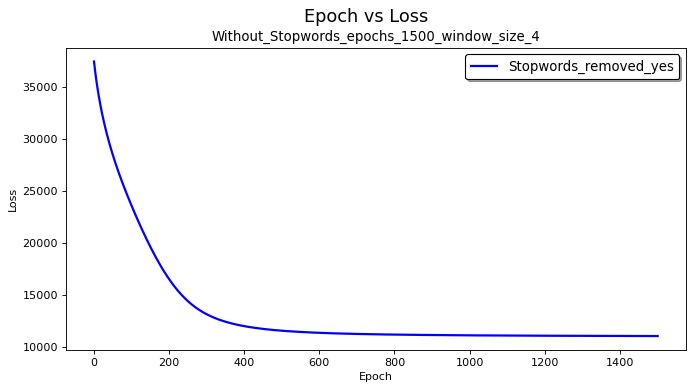

In [52]:
loss_epoch = {}
dataframe_sim = []

epoch_loss,weights_1,weights_2 = train(dimension,window_size,epochs,training_data,learning_rate,'yes',50)
loss_epoch.update( {'yes': epoch_loss} )

word_similarity_scatter_plot_bigger_corpus(
    index_to_word,
    weights_1[epochs -1],
    'Stopwords_removed_dimension_' + str(dimension) + '_epochs_' + str(epochs) + '_window_size_' +str(window_size),
    path_to_save_scatter_plot
)

df = print_similar_words(
    top_n_words,
    weights_1[epochs - 1],
    'sim_matrix for : Stopwords_removed_dimension_' + str(dimension) + '_epochs_' + str(epochs) + '_window_size_' +str(window_size),
    words_subset
)
dataframe_sim.append(df)

plot_epoch_loss(
    'Stopwords_removed_',
    loss_epoch,
    'Without_Stopwords_epochs_' + str(epochs) + '_window_size_' +str(window_size),
    path_to_save
)

Similarity matrix

In [68]:
for i in range(len(dataframe_sim)):
    display(dataframe_sim[i])

,similar:1,similar:2,similar:3,similar:4,similar:5
dogs,"('minutes', 0.53)","('toddler', 0.47)","('internet', 0.43)","('optimized', 0.43)","('features', 0.4)"
company,"('occurrence', 0.55)","('detect', 0.51)","('input', 0.44)","('biologically', 0.43)","('biological', 0.43)"
cinemas,"('online', 0.49)","('specifically', 0.47)","('capable', 0.44)","('intelligence', 0.44)","('others', 0.44)"
unsupervised,"('decisions', 0.51)","('way', 0.47)","('supervised', 0.47)","('supervision', 0.46)","('forms', 0.46)"
convolutional,"('theoretical', 0.45)","('tend', 0.42)","('applied', 0.42)","('optimized', 0.35)","('static', 0.35)"


<h4>With stopwords </h4>

Similarity matrix

In [81]:
for i in range(len(dataframe_sim)):
    display(dataframe_sim[i])

,similar:1,similar:2,similar:3,similar:4,similar:5
dogs,"('possess', 0.57)","('within', 0.57)","('which', 0.46)","('accurately', 0.44)","('forms', 0.44)"
company,"('payments', 0.64)","('wanted', 0.55)","('require', 0.51)","('if', 0.48)","('detect', 0.47)"
cinemas,"('platforms', 0.66)","('among', 0.58)","('online', 0.58)","('computing', 0.52)","('large', 0.47)"
unsupervised,"('imagine', 0.55)","('part', 0.5)","('supervision', 0.49)","('subset', 0.46)","('readily', 0.46)"
convolutional,"('recurrent', 0.77)","('tend', 0.66)","('specifically', 0.64)","('artificial', 0.63)","('anns', 0.63)"


<h4> For further variations we will be removing stopwords </h4>

<h4>2. Varying dimensions of word embedding </h4>

In [84]:
window_size = 2
training_data,training_sample_words = generate_training_data(corpus,window_size,vocab_size,word_to_index,length_of_corpus)

Running for dimension : 10
Epoch: 0. Loss:20576.46935604763
Epoch: 50. Loss:12532.313936255312
Epoch: 100. Loss:10041.030302875977
Epoch: 150. Loss:9134.229192815119
Epoch: 199. Loss:8715.284075145906
Running for dimension : 30
Epoch: 0. Loss:23377.91486632152
Epoch: 50. Loss:8743.292668799173
Epoch: 100. Loss:7589.630656951119
Epoch: 150. Loss:7479.448004147128
Epoch: 199. Loss:7446.732987057598
Running for dimension : 50
Epoch: 0. Loss:26321.199929621336
Epoch: 50. Loss:7841.920387183824
Epoch: 100. Loss:7506.291054553779
Epoch: 150. Loss:7459.64146311756
Epoch: 199. Loss:7439.5566051110445
Running for dimension : 70
Epoch: 0. Loss:28914.80332891857
Epoch: 50. Loss:7671.684680608932
Epoch: 100. Loss:7515.497732709012
Epoch: 150. Loss:7481.447464839851
Epoch: 199. Loss:7462.630183035482
Running for dimension : 90
Epoch: 0. Loss:31056.743341975285
Epoch: 50. Loss:7657.520891567781
Epoch: 100. Loss:7558.563555631619
Epoch: 150. Loss:7526.591147587169
Epoch: 199. Loss:7505.686794143581


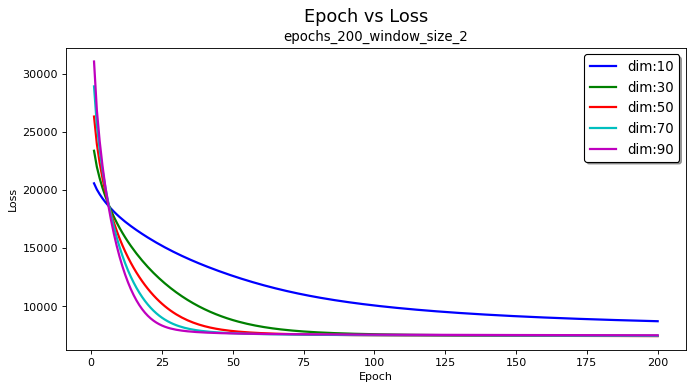

In [85]:
dimensions = [10,30,50,70,90]
loss_epoch = {}
dataframe_sim = []
for dim in dimensions:
    print('Running for dimension :' ,dim)
    
    epoch_loss,weights_1,weights_2 = train(dim,window_size,epochs,training_data,learning_rate,'yes',50)
    loss_epoch.update( {dim: epoch_loss} )
    
    word_similarity_scatter_plot_bigger_corpus(
        index_to_word,
        weights_1[epochs -1],
        'varying_dimension_' + str(dim) + '_epochs_' + str(epochs) + '_window_size_' +str(window_size),
        path_to_save_scatter_plot
    )
    
    df = print_similar_words(
        top_n_words,
        weights_1[epochs - 1],
        'sim_matrix for : dimension_' + str(dim) + '_epochs_' + str(epochs) + '_window_size_' +str(window_size),
        words_subset
    )
    dataframe_sim.append(df)
    
plot_epoch_loss(
    'dim:',
    loss_epoch,
    'epochs_' + str(epochs) + '_window_size_' +str(window_size),
    path_to_save
)

Similarity matrix

In [53]:
for i in range(len(dataframe_sim)):
    display(dataframe_sim[i])

,similar:1,similar:2,similar:3,similar:4,similar:5
थाले,"('छोड्न', 0.69)","('परम्परागत', 0.58)","('एकपछि', 0.54)","('दुःखका', 0.5)","('नेताहरुले', 0.48)"
खुलारुपमा,"('व्यवस्थाको', 0.6)","('कार्यक्रम', 0.6)","('पाइरहेको', 0.58)","('धर्म', 0.57)","('कोइरालाहरु', 0.53)"
नेतृत्वसहितको,"('संस्थागत', 0.66)","('गर्नेगरी', 0.64)","('कार्यभारका', 0.57)","('उपलब्धिलाई', 0.56)","('प्राप्त', 0.49)"
मानिसहरूले,"('गरेपछि', 0.67)","('आशंका', 0.66)","('प्रस्तावनामै', 0.55)","('समेटेको', 0.54)","('अहिलेको', 0.46)"
मुद्दा,"('जनमतसंग्रहको', 0.64)","('उठाउन', 0.61)","('टार्न', 0.52)","('प्रयास', 0.5)","('सपना', 0.46)"


<h4>3. Varying window size </h4>

In [54]:
dimension = 70
learning_rate = 0.01

Running for window_size : 2
Epoch: 0. Loss:21616.230247219577
Epoch: 50. Loss:4288.059692612249
Epoch: 100. Loss:4162.229856508774
Epoch: 150. Loss:4137.224295486977
Epoch: 200. Loss:4125.614898559086
Epoch: 250. Loss:4118.099884661296
Epoch: 300. Loss:4112.357057749937
Epoch: 350. Loss:4107.564649328341
Epoch: 400. Loss:4103.365148307405
Epoch: 450. Loss:4099.578944565484
Epoch: 500. Loss:4096.10527353249
Epoch: 550. Loss:4092.882290732882
Epoch: 600. Loss:4089.8690611624215
Epoch: 650. Loss:4087.036695809278
Epoch: 700. Loss:4084.3636750810106
Epoch: 750. Loss:4081.83323512572
Epoch: 800. Loss:4079.431833388442
Epoch: 850. Loss:4077.14820767617
Epoch: 900. Loss:4074.9727757849673
Epoch: 950. Loss:4072.8972379505294
Epoch: 1000. Loss:4070.9143042028654
Epoch: 1050. Loss:4069.017501057956
Epoch: 1100. Loss:4067.201030098647
Epoch: 1150. Loss:4065.4596614608718
Epoch: 1200. Loss:4063.788651449575
Epoch: 1250. Loss:4062.183677283948
Epoch: 1300. Loss:4060.640784318431
Epoch: 1350. Loss:4

C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2325 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2369 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2344 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2348 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2375 missing from current

C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 2330 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2371 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 2371 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2337 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 2337 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2347 missing from current font.

Running for window_size : 5
Epoch: 0. Loss:53742.66021259276
Epoch: 50. Loss:15628.810470354436
Epoch: 100. Loss:15483.04933036688
Epoch: 150. Loss:15435.074172050858
Epoch: 200. Loss:15400.348412994916
Epoch: 250. Loss:15372.026107243153
Epoch: 300. Loss:15348.249633726198
Epoch: 350. Loss:15328.015197656066
Epoch: 400. Loss:15310.613885715142
Epoch: 450. Loss:15295.506029172706
Epoch: 500. Loss:15282.271893028495
Epoch: 550. Loss:15270.581993035992
Epoch: 600. Loss:15260.175844701222
Epoch: 650. Loss:15250.846049599617
Epoch: 700. Loss:15242.426258206324
Epoch: 750. Loss:15234.782026156836
Epoch: 800. Loss:15227.803841265903
Epoch: 850. Loss:15221.401786729819
Epoch: 900. Loss:15215.5014436958
Epoch: 950. Loss:15210.040735561945
Epoch: 1000. Loss:15204.967488498303
Epoch: 1050. Loss:15200.237536629196
Epoch: 1100. Loss:15195.813241594507
Epoch: 1150. Loss:15191.662327974127
Epoch: 1200. Loss:15187.756960338662
Epoch: 1250. Loss:15184.0730060358
Epoch: 1300. Loss:15180.589441558399
Ep

C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2325 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2369 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2344 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2348 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2375 missing from current

C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2330 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 2330 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2371 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 2371 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2337 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 2337 missing from current fon

Running for window_size : 7
Epoch: 0. Loss:73246.35893500841
Epoch: 50. Loss:24351.534127245002
Epoch: 100. Loss:24171.195759239705
Epoch: 150. Loss:24081.18786947517
Epoch: 200. Loss:24015.831715470318
Epoch: 250. Loss:23966.076228667218
Epoch: 300. Loss:23927.03626091425
Epoch: 350. Loss:23895.579044956266
Epoch: 400. Loss:23869.63995389321
Epoch: 450. Loss:23847.828103064836
Epoch: 500. Loss:23829.182978863813
Epoch: 550. Loss:23813.02388922414
Epoch: 600. Loss:23798.856067595207
Epoch: 650. Loss:23786.311254633292
Epoch: 700. Loss:23775.10937845135
Epoch: 750. Loss:23765.03329105277
Epoch: 800. Loss:23755.911718911804
Epoch: 850. Loss:23747.607490849285
Epoch: 900. Loss:23740.009235858415
Epoch: 950. Loss:23733.025415799137
Epoch: 1000. Loss:23726.579963253396
Epoch: 1050. Loss:23720.609044074867
Epoch: 1100. Loss:23715.058621004235
Epoch: 1150. Loss:23709.882596009153
Epoch: 1200. Loss:23705.041376096447
Epoch: 1250. Loss:23700.500752621603
Epoch: 1300. Loss:23696.231015050496
Epo

C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2325 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2369 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2344 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2348 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2375 missing from current

C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 2330 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2371 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 2371 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2337 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 2337 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2347 missing from current font.

Running for window_size : 9
Epoch: 0. Loss:93294.47935576776
Epoch: 50. Loss:33468.253913306406
Epoch: 100. Loss:33197.423018862304
Epoch: 150. Loss:33050.62254740446
Epoch: 200. Loss:32952.47127326782
Epoch: 250. Loss:32882.42759908847
Epoch: 300. Loss:32829.81468873129
Epoch: 350. Loss:32788.69722542565
Epoch: 400. Loss:32755.571299807973
Epoch: 450. Loss:32728.24538482733
Epoch: 500. Loss:32705.27757327134
Epoch: 550. Loss:32685.677335751538
Epoch: 600. Loss:32668.739030958135
Epoch: 650. Loss:32653.944533853115
Epoch: 700. Loss:32640.90380914115
Epoch: 750. Loss:32629.31709920904
Epoch: 800. Loss:32618.94988909979
Epoch: 850. Loss:32609.615800514053
Epoch: 900. Loss:32601.164647759695
Epoch: 950. Loss:32593.473945128495
Epoch: 1000. Loss:32586.442749096732
Epoch: 1050. Loss:32579.98710262696
Epoch: 1100. Loss:32574.036603193483
Epoch: 1150. Loss:32568.531778753924
Epoch: 1200. Loss:32563.422057435764
Epoch: 1250. Loss:32558.66418011866
Epoch: 1300. Loss:32554.220945788256
Epoch: 13

C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2325 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2369 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2344 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2348 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2375 missing from current

C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2330 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 2330 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2371 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 2371 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2337 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 2337 missing from current fon

Running for window_size : 12
Epoch: 0. Loss:120878.63650356008
Epoch: 50. Loss:47630.47191557494
Epoch: 100. Loss:47164.335634834664
Epoch: 150. Loss:46934.14142144347
Epoch: 200. Loss:46794.70717459684
Epoch: 250. Loss:46700.611576394964
Epoch: 300. Loss:46632.51305050544
Epoch: 350. Loss:46580.83024796773
Epoch: 400. Loss:46540.24150923962
Epoch: 450. Loss:46507.534989052656
Epoch: 500. Loss:46480.648277354965
Epoch: 550. Loss:46458.190877576504
Epoch: 600. Loss:46439.18731088794
Epoch: 650. Loss:46422.93051765556
Epoch: 700. Loss:46408.89400229784
Epoch: 750. Loss:46396.67687352979
Epoch: 800. Loss:46385.968131836926
Epoch: 850. Loss:46376.52266389177
Epoch: 900. Loss:46368.144610865354
Epoch: 950. Loss:46360.675539965625
Epoch: 1000. Loss:46353.98585428956
Epoch: 1050. Loss:46347.96846052883
Epoch: 1100. Loss:46342.53405183885
Epoch: 1150. Loss:46337.60755909235
Epoch: 1200. Loss:46333.12544682124
Epoch: 1250. Loss:46329.03361978359
Epoch: 1300. Loss:46325.285776265875
Epoch: 1350.

C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2325 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2369 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2344 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2348 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2375 missing from current

C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2330 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 2330 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2371 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 2371 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2337 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\balkr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 2337 missing from current fon

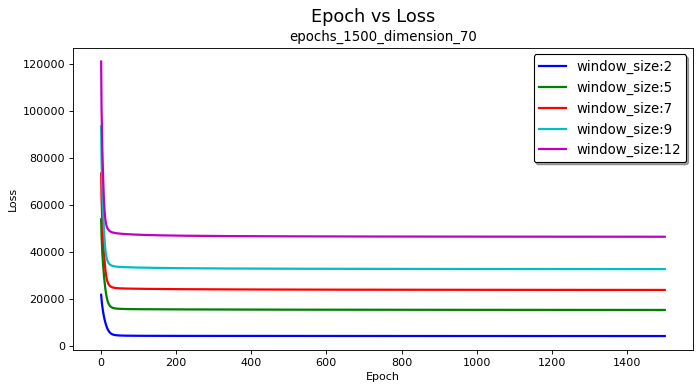

In [55]:
window_size = [2,5,7,9,12]
loss_epoch = {}
dataframe_sim = []
for ws in window_size:
    print('Running for window_size :' ,ws)
    
    training_data,training_sample_words = generate_training_data(corpus,ws,vocab_size,word_to_index,length_of_corpus)
    
    epoch_loss,weights_1,weights_2 = train(dimension,ws,epochs,training_data,learning_rate,'yes',50)
    loss_epoch.update( {ws: epoch_loss} )
    
    word_similarity_scatter_plot_bigger_corpus(
        index_to_word,
        weights_1[epochs -1],
        'varuing_window_size_' + str(ws) + '_epochs_' + str(epochs) + 'dimension_' +str(dimension),
        path_to_save_scatter_plot
    )
    
    df = print_similar_words(
        top_n_words,
        weights_1[epochs - 1],
        'sim_matrix for : dimension_' + str(dimension) + '_epochs_' + str(epochs) + '_window_size_' +str(ws),
        words_subset
    )
    dataframe_sim.append(df)
    
plot_epoch_loss(
    'window_size:',
    loss_epoch,
    'epochs_' + str(epochs) + '_dimension_' +str(dimension),
    path_to_save
)

Similarity matrix

In [56]:
for i in range(len(dataframe_sim)):
    display(dataframe_sim[i])

,similar:1,similar:2,similar:3,similar:4,similar:5
थाले,"('फरकफरक', 0.32)","('चालकहरुले', 0.31)","('चरित्रको', 0.31)","('संकेत', 0.3)","('शीर्ष', 0.28)"
खुलारुपमा,"('कार्यक्रम', 0.33)","('मानिस', 0.29)","('महत्वाकांक्षामा', 0.28)","('साइनोभन्दा', 0.26)","('गुमाउनुपर्', 0.26)"
नेतृत्वसहितको,"('गरिदिए', 0.3)","('स्पेश', 0.3)","('नेपालको', 0.29)","('वैकल्पिक', 0.27)","('महत्वाकांक्षालाई', 0.25)"
मानिसहरूले,"('समेटेको', 0.38)","('प्रणालीलाई', 0.37)","('आशंका', 0.31)","('गरिरहे', 0.28)","('गुमाउनु', 0.28)"
मुद्दा,"('अप्ठ्योरो', 0.38)","('थालेको', 0.37)","('कन्जर्भेटिज्म', 0.32)","('समावेशीता', 0.31)","('चालकहरुले', 0.31)"


,similar:1,similar:2,similar:3,similar:4,similar:5
थाले,"('छोड्न', 0.65)","('परम्परागत', 0.51)","('एकपछि', 0.49)","('दलहरुमा', 0.48)","('दिनहरू', 0.48)"
खुलारुपमा,"('व्यवस्थाको', 0.7)","('पाइरहेको', 0.57)","('कार्यक्रम', 0.53)","('राजासहितको', 0.5)","('सुन्दर', 0.49)"
नेतृत्वसहितको,"('कार्यभारका', 0.65)","('गर्नेगरी', 0.65)","('संस्थागत', 0.62)","('चाहिन्छ', 0.56)","('प्राप्त', 0.51)"
मानिसहरूले,"('आशंका', 0.61)","('गरेपछि', 0.56)","('प्रस्तावनामै', 0.5)","('बेलाबेलामा', 0.5)","('समेटेको', 0.5)"
मुद्दा,"('जनमतसंग्रहको', 0.57)","('प्रयास', 0.57)","('टार्न', 0.56)","('उनीसँग', 0.54)","('अप्ठ्योरो', 0.47)"


,similar:1,similar:2,similar:3,similar:4,similar:5
थाले,"('दलहरुमा', 0.71)","('छोड्न', 0.7)","('एकपछि', 0.66)","('व्यापक', 0.61)","('ध्रुवीकरण', 0.61)"
खुलारुपमा,"('कार्यक्रम', 0.77)","('व्यवस्थाको', 0.7)","('पाइरहेको', 0.7)","('शशांक', 0.64)","('पक्ष', 0.63)"
नेतृत्वसहितको,"('गर्नेगरी', 0.77)","('कार्यभारका', 0.74)","('उपलब्धिलाई', 0.67)","('संस्थागत', 0.63)","('यात्रा', 0.57)"
मानिसहरूले,"('आशंका', 0.7)","('समेटेको', 0.66)","('गरेपछि', 0.61)","('बेलाबेलामा', 0.6)","('प्रणालीलाई', 0.59)"
मुद्दा,"('प्रयास', 0.7)","('जनमतसंग्रहको', 0.67)","('टार्न', 0.59)","('उनीसँग', 0.56)","('उठाउन', 0.55)"


,similar:1,similar:2,similar:3,similar:4,similar:5
थाले,"('छोड्न', 0.79)","('दलहरुमा', 0.7)","('एकपछि', 0.7)","('व्यापक', 0.7)","('दिनहरू', 0.69)"
खुलारुपमा,"('कार्यक्रम', 0.81)","('व्यवस्थाको', 0.78)","('पाइरहेको', 0.74)","('शशांक', 0.69)","('कोइरालाहरु', 0.67)"
नेतृत्वसहितको,"('कार्यभारका', 0.82)","('संस्थागत', 0.77)","('गर्नेगरी', 0.76)","('उपलब्धिलाई', 0.73)","('यात्रा', 0.69)"
मानिसहरूले,"('प्रस्तावनामै', 0.75)","('समेटेको', 0.73)","('आशंका', 0.73)","('गरेपछि', 0.73)","('बेलाबेलामा', 0.73)"
मुद्दा,"('प्रयास', 0.71)","('जनमतसंग्रहको', 0.7)","('टार्न', 0.69)","('उनीसँग', 0.67)","('अप्ठ्योरो', 0.66)"


,similar:1,similar:2,similar:3,similar:4,similar:5
थाले,"('छोड्न', 0.84)","('दलहरुमा', 0.83)","('एकपछि', 0.81)","('दिनहरू', 0.79)","('दुःखका', 0.76)"
खुलारुपमा,"('व्यवस्थाको', 0.83)","('पाइरहेको', 0.79)","('कार्यक्रम', 0.78)","('शशांक', 0.77)","('पक्ष', 0.73)"
नेतृत्वसहितको,"('कार्यभारका', 0.9)","('गर्नेगरी', 0.87)","('संस्थागत', 0.84)","('उपलब्धिलाई', 0.77)","('प्राप्त', 0.72)"
मानिसहरूले,"('आशंका', 0.84)","('गरेपछि', 0.82)","('बेलाबेलामा', 0.81)","('समेटेको', 0.78)","('प्रस्तावनामै', 0.76)"
मुद्दा,"('जनमतसंग्रहको', 0.81)","('टार्न', 0.79)","('उनीसँग', 0.76)","('प्रयास', 0.75)","('अप्ठ्योरो', 0.73)"
